<a href="https://colab.research.google.com/github/Zerubabel-J/stock_market_data_analysis/blob/main/nova_financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/TenX/data/raw_analyst_ratings.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [10]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Text Analysis (Sentiment Analysis & Topic Modeling):



In [13]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])


Time Series Analysis:

In [15]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')


<ipython-input-15-774412963e53>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')


In [16]:
print(df['date'].isna().sum())  # Check how many dates could not be parsed


1351341


<Axes: xlabel='date'>

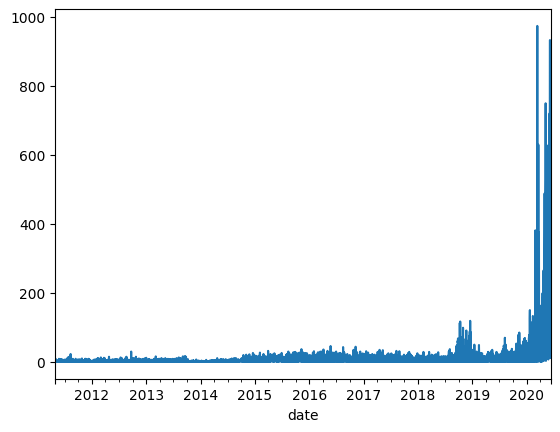

In [17]:
df.set_index('date', inplace=True)
df['headline'].resample('D').count().plot()
